In [12]:
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import missingno as msno # type: ignore

a, reading the dataset

In [2]:
df= pd.read_csv(r'C:\Users\CHARLOTTE\Downloads\exam_cohort3\exam_cohort3\data.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

b, inspecting the missing values.

In [3]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


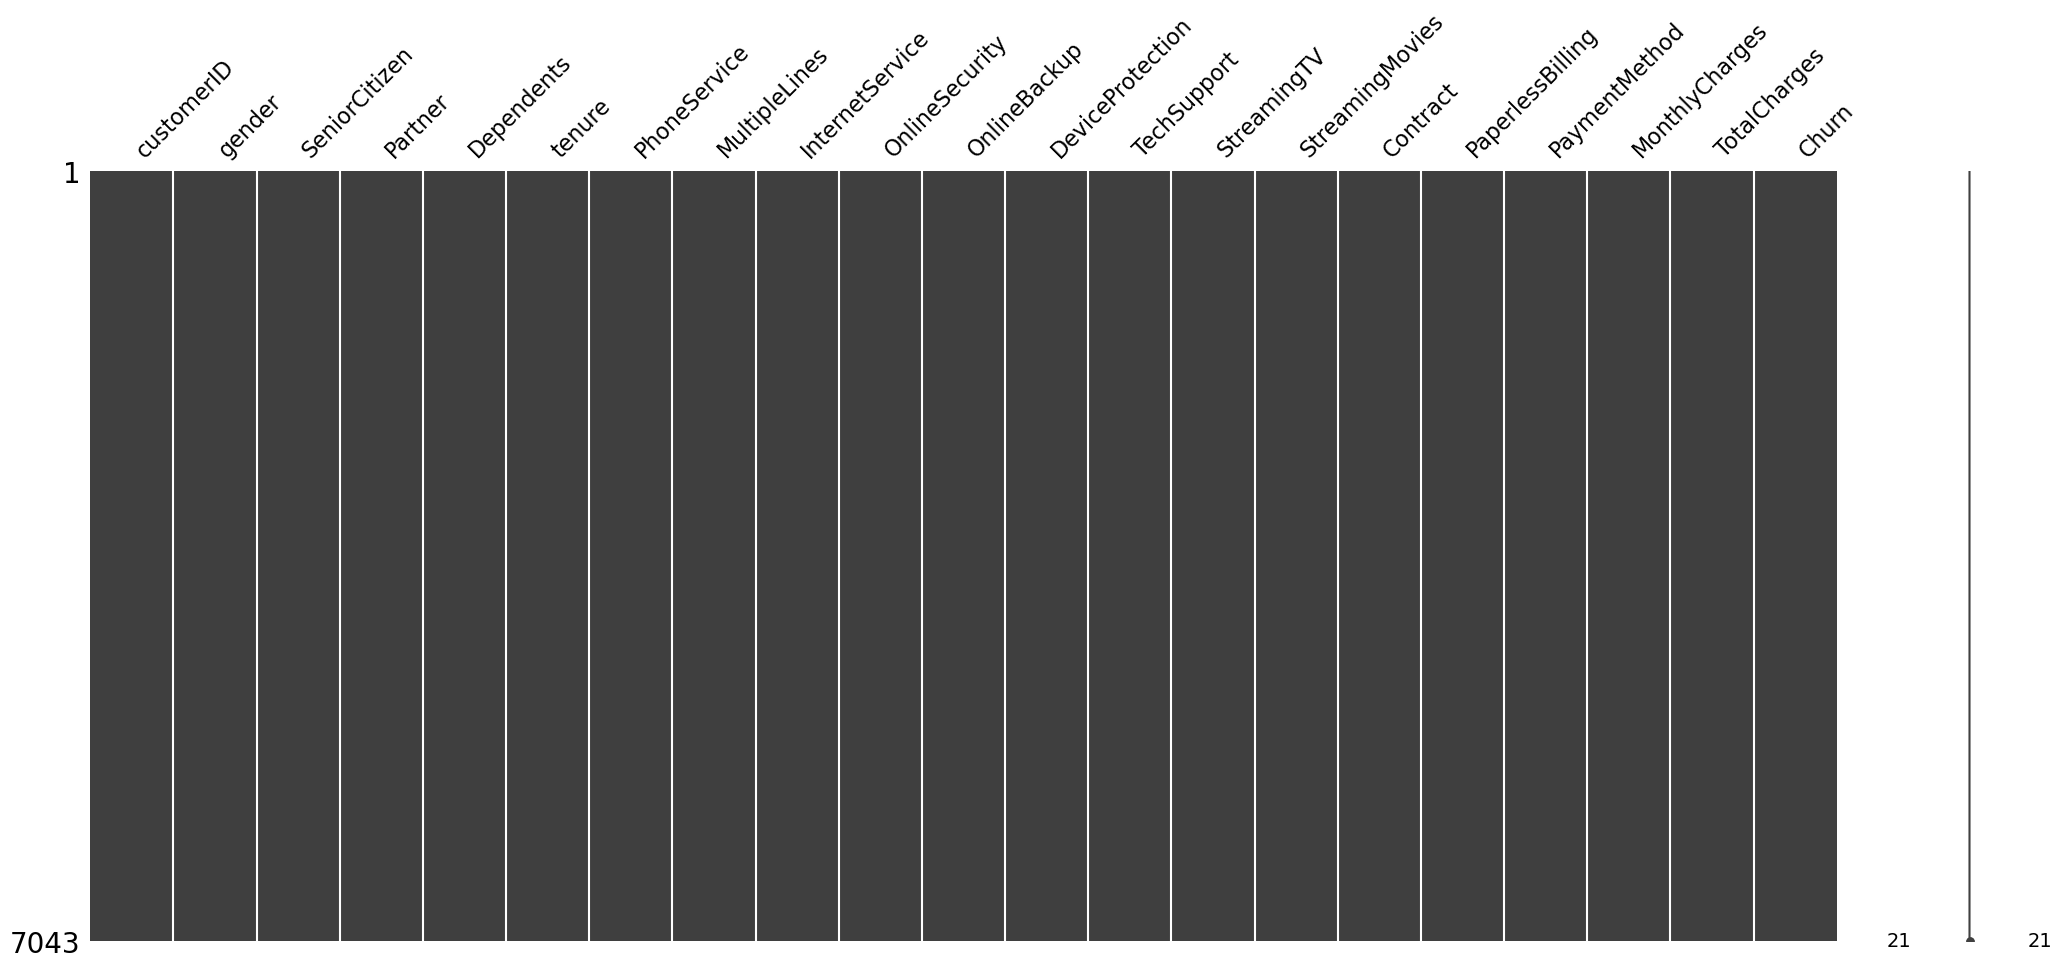

In [14]:
# Visualize missing values
msno.matrix(df)
plt.show()

c, determining how big my matrix is.

In [16]:
matrix_size = df.shape
print("Size of the matrix:", matrix_size)

Size of the matrix: (7043, 21)


d,   variables in the matrix

In [17]:
num_variables = df.shape[1]
print("Number of variables in the matrix:", num_variables)


Number of variables in the matrix: 21


In [60]:
# Number of variables
print("Number of variables:", len(df.columns))

Number of variables: 21


e, Dropping any unnecessary columns in the resulting matrix

In [25]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [26]:
# Drop 'customerID' column
df.drop(columns=['customerID'], inplace=True)

# Remove duplicate lines
df.drop_duplicates(inplace=True)


In [27]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


f, Using the ’fillna’ function in your environment, fill the missing values in the column ’TotalCharges’
using the mean values of the same column. (hint: one could first ascertain how many rows are
missing data points in the ”TotalCharges” column using the following piece of code: ”data[’TotalCharges’]
= pd.to numeric(data.TotalCharges, errors=’coerce’”; and ”data.isnull().sum()”)

In [18]:
# Convert 'TotalCharges' column to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Count missing values in 'TotalCharges' column
missing_total_charges = df['TotalCharges'].isnull().sum()

# Fill missing values with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [19]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

g,  Transforming the labels for the variable ”SeniorCitizen” from ”0/1” to ”No/Yes

In [21]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [22]:
df['SeniorCitizen']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7038    NaN
7039    NaN
7040    NaN
7041    NaN
7042    NaN
Name: SeniorCitizen, Length: 7043, dtype: object

In [61]:
#  Fill missing values in 'TotalCharges' column with mean
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

#  Transform labels for 'SeniorCitizen'
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Check transformed dataframe
print("Transformed dataframe:")
print(df.head())

Transformed dataframe:
   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

NO, 3a   exploring the distribution of customer churn in the dataset


In [29]:

churn_distribution = df['Churn'].value_counts(normalize=True)
print(churn_distribution)


Churn
No     0.735785
Yes    0.264215
Name: proportion, dtype: float64


b, How the customer churn distribution vary across gender in the dataset

In [63]:
churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True)
print("Customer churn distribution across gender:")
print(churn_by_gender)

Customer churn distribution across gender:
gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64


c,How  the customer churn distribution vary by contract type

In [64]:
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True)
print("Customer churn distribution by contract type:")
print(churn_by_contract)

Customer churn distribution by contract type:
Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64


d, How  the customer churn distribution vary by payment method

In [65]:
churn_by_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)
print("Customer churn distribution by payment method:")
print(churn_by_payment)

Customer churn distribution by payment method:
PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64


e, How the customer churn distribution vary by internet service and gender

In [66]:
churn_by_internet_gender = df.groupby(['InternetService', 'gender'])['Churn'].value_counts(normalize=True)
print("Customer churn distribution by internet service and gender:")
print(churn_by_internet_gender)


Customer churn distribution by internet service and gender:
InternetService  gender  Churn
DSL              Female  No       0.815657
                         Yes      0.184343
                 Male    No       0.805353
                         Yes      0.194647
Fiber optic      Female  No       0.572440
                         Yes      0.427560
                 Male    No       0.589760
                         Yes      0.410240
No               Female  No       0.925033
                         Yes      0.074967
                 Male    No       0.926829
                         Yes      0.073171
Name: proportion, dtype: float64


f, Visualizing and comparing the correlation between churn rates and other variables

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object
customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
Stream

c:\Users\CHARLOTTE\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


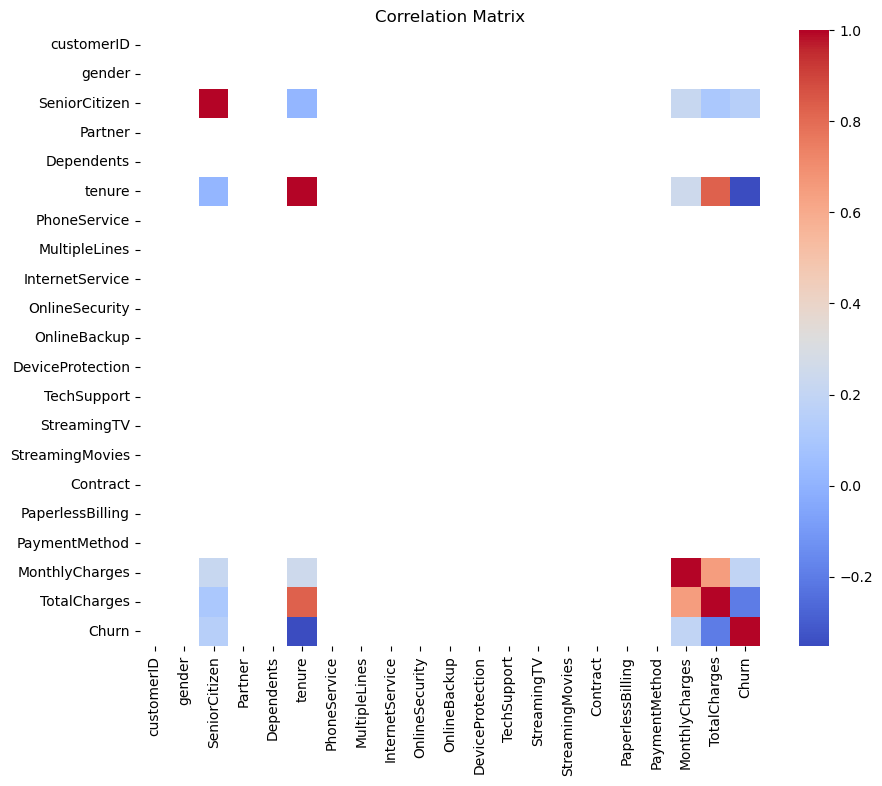

In [42]:

# Check the data types of each column
print(data.dtypes) # type: ignore

# Convert non-numeric columns to appropriate numeric representations
for column in data.columns:
    if data[column].dtype == 'object': # type: ignore
        data[column] = pd.to_numeric(data[column], errors='coerce') # type: ignore

# Check the data types again to ensure conversion
print(data.dtypes) # type: ignore

# Now, proceed with correlation analysis
correlation_matrix = data.corr() # type: ignore

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()






Unique values in column 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': ['Yes' 'No']
Unique values in column 'Dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'PhoneService': ['No' 'Yes']
Unique values in column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['No' 'Yes' 'No internet serv

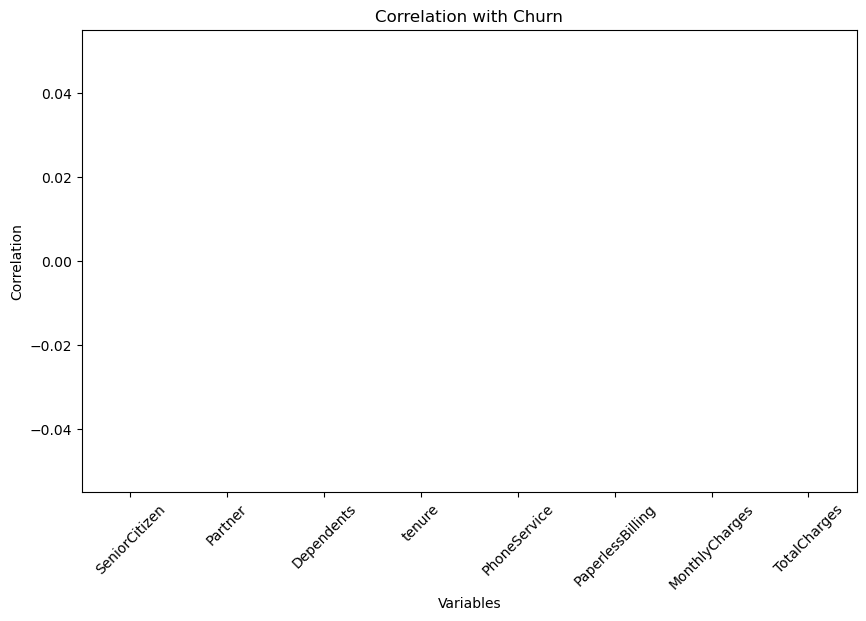

In [49]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Load the dataset
df = pd.read_csv(r'C:\Users\CHARLOTTE\Downloads\exam_cohort3\exam_cohort3\data.csv')

# Check unique values of each column
for column in df.columns:
    print(f"Unique values in column '{column}': {df[column].unique()}")

# Convert 'Churn' column to numeric if necessary
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

# Check unique values in 'Churn' column after conversion
print(f"Unique values in 'Churn' column after conversion: {df['Churn'].unique()}")

# Drop rows with NaN values in 'Churn' column
df = df.dropna(subset=['Churn'])

# Compute correlation matrix
correlation_matrix = df.corr()

# Specify variables of interest
interest_vars = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']

# Filter correlation matrix for specified variables
churn_correlation = correlation_matrix['Churn'][interest_vars]

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_correlation.index, y=churn_correlation.values)
plt.title('Correlation with Churn')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()



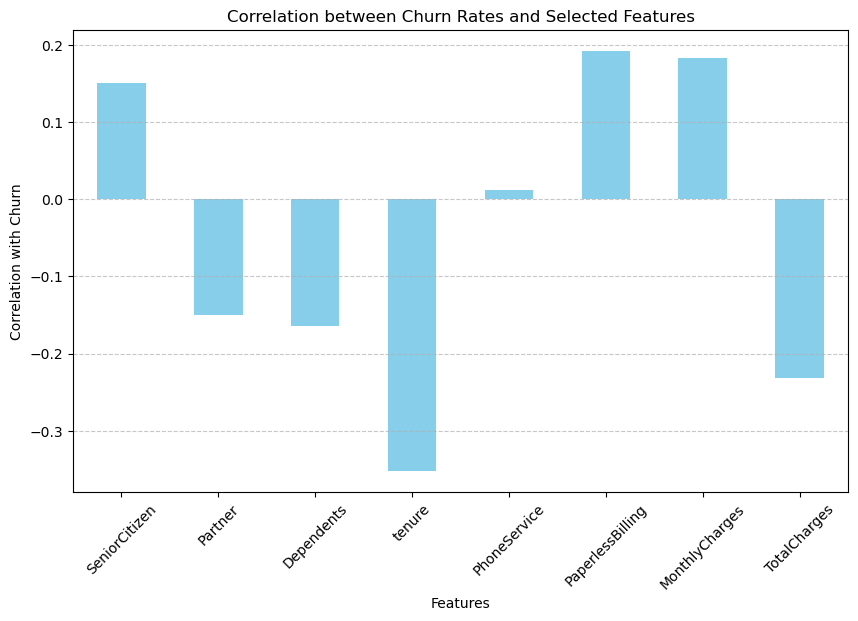

In [70]:
from sklearn.preprocessing import LabelEncoder

#specifying the features
selected_features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                     'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Creating a subset df with the specified features
subset_df = df[selected_features].copy()  
#encoding categorical labels with numerical labels
label_encoder = LabelEncoder()
for feature in selected_features:
    subset_df[feature] = label_encoder.fit_transform(subset_df[feature])
#    
correlation_with_churn = subset_df.corr()['Churn'].drop('Churn')
plt.figure(figsize=(10, 6))
correlation_with_churn.plot(kind='bar', color='skyblue')
plt.title('Correlation between Churn Rates and Selected Features')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

no 4

In [ ]:
 #breakdown
# Loading the Dataset: We'll start by loading the dataset into a DataFrame using pandas.
# Data Preprocessing: We need to preprocess the data by standardizing the numerical columns ('tenure', 'MonthlyCharges', 'TotalCharges') to ensure that they are on the same scale.
# Creating Input and Output Matrices: We'll create the input matrix 'X' containing the features used for classification and the output vector 'y' containing the target variable ('Churn').
# Classification using Logistic Regression and K-Nearest Neighbors: We'll train models using Logistic Regression and K-Nearest Neighbors algorithms to classify the churn among customers.
# Model Evaluation: Finally, we'll evaluate the performance of both models.

In [ ]:
#steps to follow


#  1.Preprocess the data: Handle missing values, encode categorical variables, and standardize numerical features.
# 2. Split the data into training and testing sets.
# 3. Train logistic regression and K-Nearest Neighbors (KNN) models.
# 4. Evaluate the models using cross-validation and calculate performance metrics such as ROC AUC and accuracy.
# 5. Compare the performance of the two models.

In [59]:
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score # type: ignore
from sklearn.preprocessing import StandardScaler, LabelEncoder # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.metrics import roc_auc_score, accuracy_score # type: ignore
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.compose import ColumnTransformer # type: ignore

# Read the data
df = pd.read_csv(r'C:\Users\CHARLOTTE\Downloads\exam_cohort3\exam_cohort3\data.csv')

# Preprocess the data
X = df.drop(columns=['Churn', 'customerID'])  # Features
y = df['Churn']  # Target

# Encode categorical variables
encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = encoder.fit_transform(X[col])

# Standardize numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define models
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()

# Define pipeline for logistic regression model
logistic_pipeline = Pipeline([
    ('classifier', logistic_model)
])

# Define pipeline for KNN model
knn_pipeline = Pipeline([
    ('classifier', knn_model)
])

# Evaluate models using cross-validation
models = [('Logistic Regression', logistic_pipeline), ('K-Nearest Neighbors', knn_pipeline)]
results = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append((name, cv_scores.mean(), cv_scores.std(), accuracy_scores.mean(), accuracy_scores.std()))

# Display evaluation results
results_df = pd.DataFrame(results, columns=['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD'])
print(results_df)


             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression      0.838371     0.010271       0.800497      0.010963
1  K-Nearest Neighbors      0.764903     0.013461       0.758784      0.007976
